In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt    ### importing the libraries

In [2]:
hotel_df = pd.read_csv("D:/Documents/Data Science/Final_Evaluation_Project/Gautam Yakasiri_CuvetteDS/Gautam Yakasiri_Machine Learning/hotel_bookings.csv",header=0)
   ### reading the file

In [3]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
hotel_df.shape

(119390, 32)

In [5]:
hotel_df.info()      ### checking which columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Dropping Unnecessary Columns

In [6]:
hotel_df.drop(columns=['company'],inplace=True)   ### since it has mostly null vales and no questions are asked on it

In [7]:
hotel_df.drop(columns=['arrival_date_week_number'], inplace=True)    ### since it is correlated with 
                                                                    ### arrival_date_day_of_month and arrival_date_month

In [8]:
hotel_df[['stays_in_weekend_nights', 'stays_in_week_nights', 'is_canceled']].corr()    ### checking if these stays have anything to do with 
                                    ### 'is_cancelled' target variable, as logically they don't mean anything with cancellations

,stays_in_weekend_nights,stays_in_week_nights,is_canceled
stays_in_weekend_nights,1.000000,0.498969,-0.001791
stays_in_week_nights,0.498969,1.000000,0.024765
is_canceled,-0.001791,0.024765,1.000000


In [9]:
hotel_df.drop(columns=['stays_in_weekend_nights','stays_in_week_nights'], inplace=True)    ### since their correlation with target variable is very weak
                                             ### i.e < 0.1

In [10]:
hotel_df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [11]:
hotel_df['adults'].value_counts()

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [12]:
hotel_df[['children','adults','is_canceled']].corr() 

,children,adults,is_canceled
children,1.000000,0.030447,0.005048
adults,0.030447,1.000000,0.060017
is_canceled,0.005048,0.060017,1.000000


In [13]:
hotel_df.drop(columns=['children'],inplace=True)  ### since most of the bookings do not have children and corr is very low

In [14]:
hotel_df['babies'].value_counts()

babies
0     118473
1        900
2         15
10         1
9          1
Name: count, dtype: int64

In [15]:
hotel_df.drop(columns=['babies'],inplace=True) ### since most of the bookings have 0 babies

In [16]:
hotel_df.drop(columns=['distribution_channel'], inplace=True)   ### since market segment already covers this information

In [17]:
room_change = hotel_df['reserved_room_type'] != hotel_df['assigned_room_type']  ### since both reserved_room_type
 ### and assigned_room_type are different at 14917 bookings, it is better to keep them both
room_change.value_counts()

False    104473
True      14917
Name: count, dtype: int64

In [18]:
hotel_df.drop(columns=['required_car_parking_spaces'],inplace=True) ### hotels usually have enough parking,
                                                                    ### so requiring a space might not strongly affect cancellations.

In [19]:
hotel_df.drop(columns=['reservation_status'],inplace=True)   ### already covered by target variable, 'is_canceled'

In [20]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   meal                            119390 non-null  object 
 8   country                         118902 non-null  object 
 9   market_segment                  119390 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

### Filling Null Values

In [21]:
hotel_df['country'].value_counts()

country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [22]:
hotel_df['country'].fillna('PRT',inplace=True)  ### since portugal is the most frequent country and removing 488 entries means missing data

C:\Users\Gautam\AppData\Local\Temp\ipykernel_49568\1264214331.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_df['country'].fillna('PRT',inplace=True)  ### since portugal is the most frequent country and removing 488 entries means missing data


In [23]:
hotel_df['country'].value_counts()

country
PRT    49078
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

In [24]:
hotel_df['agent'].value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [25]:
hotel_df['agent'].replace('NULL', np.nan, inplace=True) ### since it has null string , we replace with null value

C:\Users\Gautam\AppData\Local\Temp\ipykernel_49568\627051826.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_df['agent'].replace('NULL', np.nan, inplace=True) ### since it has null string , we replace with null value


In [26]:
hotel_df['agent'].fillna(9,inplace=True)  ### imputing with most frequent id , i.e 9

C:\Users\Gautam\AppData\Local\Temp\ipykernel_49568\3212438757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_df['agent'].fillna(9,inplace=True)  ### imputing with most frequent id , i.e 9


In [27]:
hotel_df['agent'].value_counts()

agent
9.0      48301
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: count, Length: 333, dtype: int64

### Outliers

In [28]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,15.798241,1.856403,0.031912,0.087118,0.137097,0.221124,76.060080,2.321149,101.831122,0.571363
std,0.482918,106.863097,0.707476,8.780829,0.579261,0.175767,0.844336,1.497437,0.652306,106.323205,17.594721,50.535790,0.792798
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000
25%,0.000000,18.000000,2016.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000
50%,0.000000,69.000000,2016.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000
75%,1.000000,160.000000,2017.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,1.000000
max,1.000000,737.000000,2017.000000,31.000000,55.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,5.000000


### outliers are for max: 
#### lead_time, adults, previous_cancellations, previous_bookings_not_cancelled, booking_changes, days_in_waiting_list total_of_special_requests
#### and adr has negative values

### Lead Time

<Axes: xlabel='lead_time'>

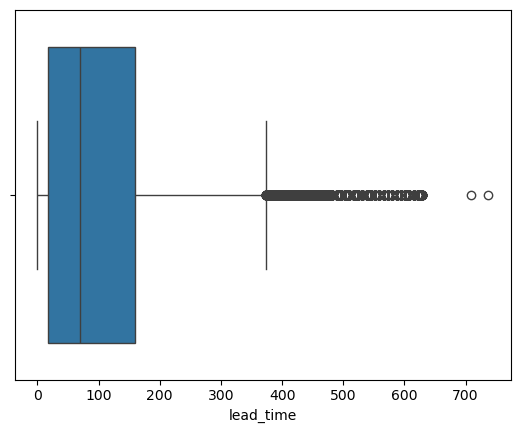

In [29]:
sns.boxplot(x=hotel_df['lead_time'])      ### checking for outliers and wheree they are

In [30]:
hotel_df['lead_time'].skew()          ### checking the skewness of the data

1.3465498727254268

In [31]:
hotel_df['lead_time_sqrt'] = np.sqrt(hotel_df['lead_time']) ### since values at the end are increasing rapidly,
  ### square root transformation will decrease the skewness, but we need original lead time, to calculate booking time later.

In [32]:
hotel_df['lead_time_sqrt'].skew()    

0.29102445151337175

<Axes: xlabel='lead_time_sqrt'>

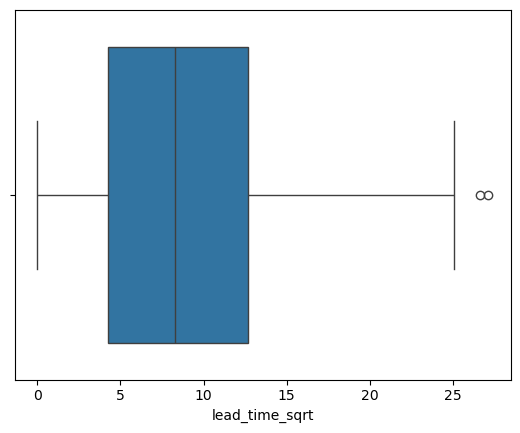

In [33]:
sns.boxplot(x=hotel_df['lead_time_sqrt'])                ### we can see that max value is less than (99th percentile value * 3), so no need to cap anymore

In [34]:
hotel_df['lead_time_sqrt'].value_counts()   ### let's cap the upper values

lead_time_sqrt
0.000000     6345
1.000000     3460
1.414214     2069
1.732051     1816
2.000000     1715
             ... 
20.000000       1
19.235384       1
23.065125       1
19.261360       1
21.517435       1
Name: count, Length: 479, dtype: int64

In [35]:
uv_lead_time_sqrt = np.percentile(hotel_df['lead_time_sqrt'],[99])[0]
uv_lead_time_sqrt

21.071307505705477

In [36]:
hotel_df.loc[(hotel_df['lead_time_sqrt']>uv_lead_time_sqrt),'lead_time_sqrt'] = uv_lead_time_sqrt   ### capping at 99%

### Adults

In [37]:
hotel_df['adults'].skew()    ### it looks highly skewed in right area

18.317804759206094

<Axes: xlabel='adults'>

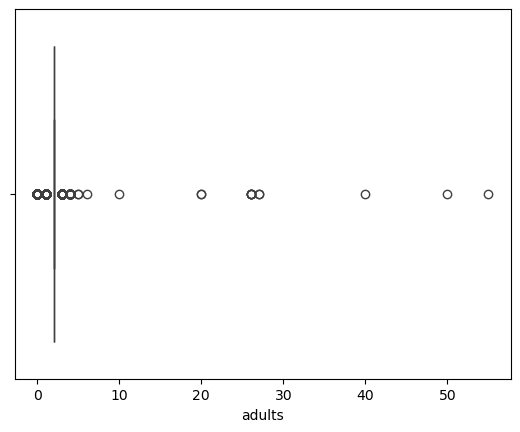

In [38]:
sns.boxplot(x=hotel_df['adults'])

In [39]:
hotel_df['adults'].value_counts()   ## we can see that there are extreme values like 26,27,etc, also there can't be a booking with 0 adults
                                ## so, we will cap the values and also replace 0 with maximum frequent value, i.e 2

adults
2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: count, dtype: int64

In [40]:
uv_adults = np.percentile(hotel_df['adults'],[99])[0]
uv_adults

3.0

In [41]:
hotel_df.loc[(hotel_df['adults']>3*uv_adults),'adults'] = 3*uv_adults   ### capping above 9 values to 9

In [42]:
hotel_df.loc[hotel_df['adults'] == 0,'adults'] = 2   ### replacing invalid bookings with 0 adults to most frequent value, i.e 2 adults

In [43]:
hotel_df['adults'].value_counts()

adults
2    90083
1    23027
3     6202
4       62
9       13
5        2
6        1
Name: count, dtype: int64

In [44]:
hotel_df['adults'].skew() 

0.013502205647268683

<Axes: xlabel='adults'>

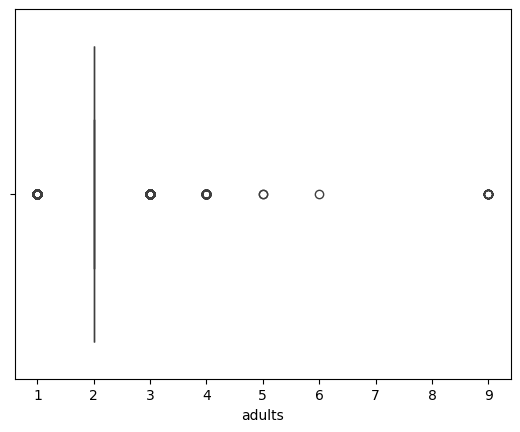

In [45]:
sns.boxplot(x=hotel_df['adults'])

### Previous Cancellations

<Axes: xlabel='previous_cancellations'>

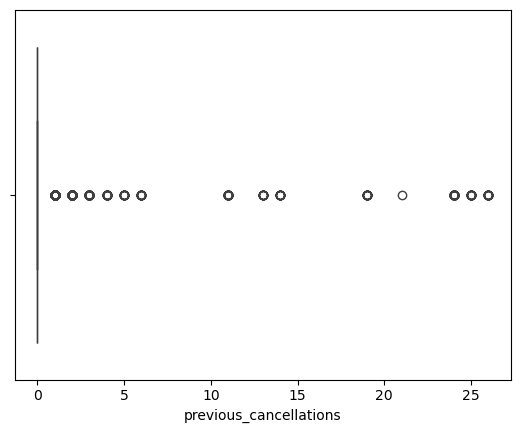

In [46]:
sns.boxplot(x=hotel_df['previous_cancellations'])

In [47]:
hotel_df['previous_cancellations'].value_counts()

previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: count, dtype: int64

In [108]:
#### It is better not to cap previous cancellations even though there are visible outliers, as it might change high risk customers data

### Previous Bookings not cancelled

<Axes: xlabel='previous_bookings_not_canceled'>

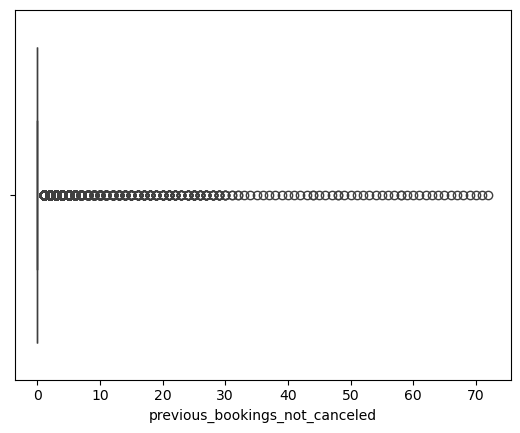

In [49]:
sns.boxplot(x=hotel_df['previous_bookings_not_canceled'])

In [50]:
hotel_df['previous_bookings_not_canceled'].value_counts()

previous_bookings_not_canceled
0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: count, Length: 73, dtype: int64

In [51]:
### same reason as before, capping might stain the data and we have a question on weighted booking score

### Booking Changes

<Axes: xlabel='booking_changes'>

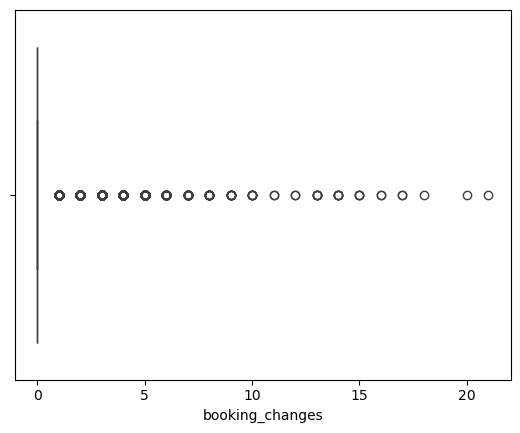

In [52]:
sns.boxplot(x=hotel_df['booking_changes'])

In [53]:
hotel_df['booking_changes'].value_counts()

booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
13         5
14         5
15         3
16         2
17         2
12         2
11         2
20         1
21         1
18         1
Name: count, dtype: int64

In [54]:
hotel_df[['is_canceled','booking_changes']].corr()

,is_canceled,booking_changes
is_canceled,1.000000,-0.144381
booking_changes,-0.144381,1.000000


In [55]:
### even though they have a weak relation, capping might remove bookings with many changes, so let's keep them as it is

### Days in Waiting List

In [56]:
hotel_df[['is_canceled','days_in_waiting_list']].corr()

,is_canceled,days_in_waiting_list
is_canceled,1.000000,0.054186
days_in_waiting_list,0.054186,1.000000


In [57]:
#### it does not have that much correlation and there is no logical relation between them, so we can cap extreme outliers

In [58]:
hotel_df['days_in_waiting_list'].skew()

11.944353446438399

<Axes: xlabel='days_in_waiting_list'>

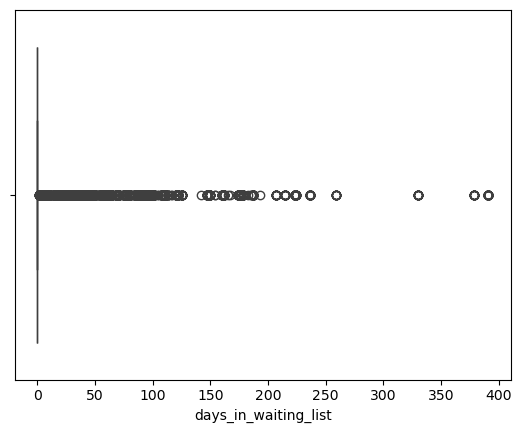

In [59]:
sns.boxplot(x=hotel_df['days_in_waiting_list'])

In [60]:
hotel_df['days_in_waiting_list'].value_counts()

days_in_waiting_list
0      115692
39        227
58        164
44        141
31        127
        ...  
116         1
109         1
37          1
89          1
36          1
Name: count, Length: 128, dtype: int64

In [61]:
uv_booking_changes = np.percentile(hotel_df['days_in_waiting_list'],[99])[0]    ### based on data, it is better to keep them as 
### numerical as we have many values, i am capping at 75
uv_booking_changes

75.0

In [62]:
hotel_df.loc[(hotel_df['days_in_waiting_list']>uv_booking_changes),'days_in_waiting_list'] = uv_booking_changes

In [63]:
hotel_df['days_in_waiting_list'].value_counts()

days_in_waiting_list
0     115692
75      1218
39       227
58       164
44       141
       ...  
73         1
37         1
72         1
74         1
36         1
Name: count, Length: 72, dtype: int64

### adr

In [64]:
hotel_df['adr'].skew()

10.53021398218952

<Axes: xlabel='adr'>

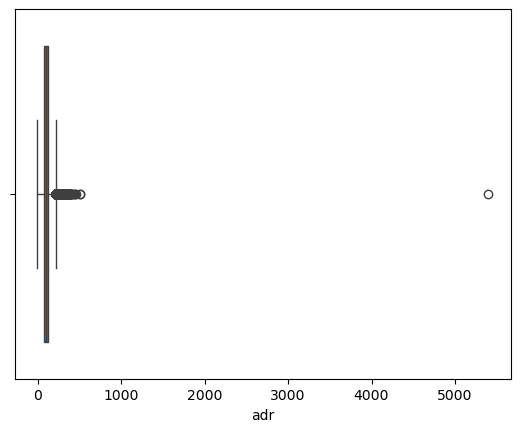

In [65]:
sns.boxplot(x=hotel_df['adr'])

In [66]:
hotel_df['adr'].value_counts()   ### we can observe from the plot and values, that there are outliers at left and right sides, so we cap at both ends

adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1959
          ... 
89.43        1
63.07        1
55.69        1
49.51        1
157.71       1
Name: count, Length: 8879, dtype: int64

In [67]:
uv_adr = np.percentile(hotel_df['adr'],[99])[0] 
uv_adr

252.0

In [68]:
lv_adr = np.percentile(hotel_df['adr'],[1])[0]  
lv_adr 

0.0

In [69]:
hotel_df.loc[(hotel_df['adr']>uv_adr),'adr'] = uv_adr
hotel_df.loc[(hotel_df['adr']<lv_adr),'adr'] = lv_adr    ### adr can't be less than 0
hotel_df['adr'].value_counts()

adr
62.00     3754
75.00     2715
90.00     2473
65.00     2418
0.00      1960
          ... 
43.96        1
40.31        1
71.44        1
41.47        1
157.71       1
Name: count, Length: 8454, dtype: int64

<Axes: xlabel='adr'>

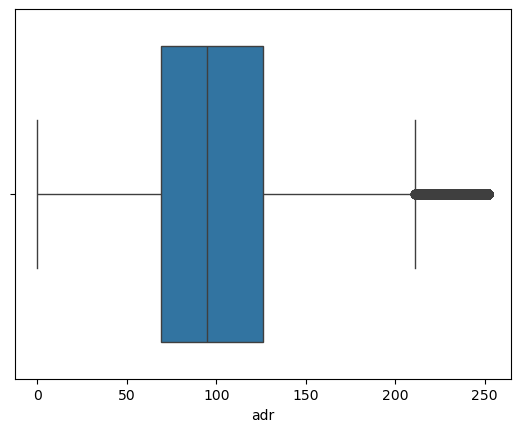

In [70]:
sns.boxplot(x=hotel_df['adr'])

In [71]:
hotel_df['adr'].skew() ### looks like it is good enough

0.7994396514542224

### Total Of Special Requests

In [72]:
hotel_df['total_of_special_requests'].skew()

1.3491893774222594

<Axes: xlabel='total_of_special_requests'>

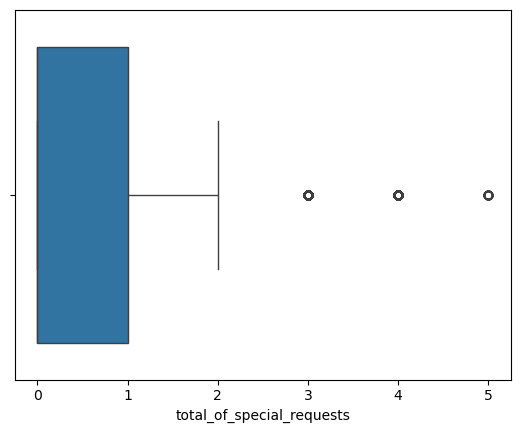

In [73]:
sns.boxplot(x=hotel_df['total_of_special_requests'])

In [74]:
hotel_df['total_of_special_requests'].value_counts()  ### it looks like only 0,1,2 are significant, but no need to cap

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64

### Agent

In [75]:
hotel_df['agent'].skew()

1.3110280787451896

<Axes: xlabel='agent'>

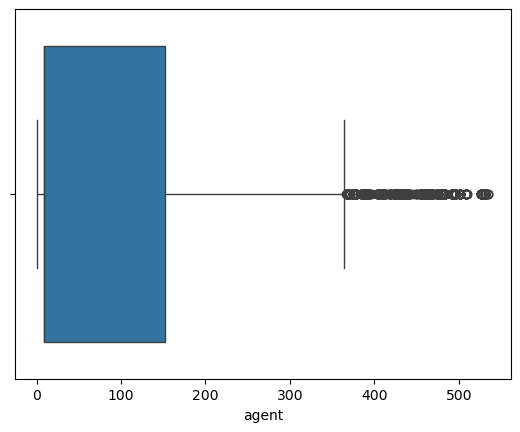

In [76]:
sns.boxplot(x=hotel_df['agent'])

In [77]:
hotel_df['agent'].value_counts()    ### agent has id's which are discrete integers, but their id number does not have impact, 
                                    ### number of bookings of that particular agent has an impact, so we do frequency encoding,
                                    ### i.e, replace id's with their number of bookings 

agent
9.0      48301
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
280.0        1
285.0        1
289.0        1
265.0        1
497.0        1
Name: count, Length: 333, dtype: int64

In [78]:
agent_counts = hotel_df['agent'].value_counts().to_dict()
hotel_df['agent'] = hotel_df['agent'].map(agent_counts)  ### now agent  column has bookings of that particular agent

In [79]:
hotel_df[['agent','is_canceled']].corr()   ### but, seems bookings of each agent is also not impacting much on the cancellations,
   ### so, i am dropping it

,agent,is_canceled
agent,1.000000,-0.010939
is_canceled,-0.010939,1.000000


In [80]:
hotel_df.drop(columns = ['agent'], inplace=True)

In [81]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_day_of_month       119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   meal                            119390 non-null  object 
 8   country                         119390 non-null  object 
 9   market_segment                  119390 non-null  object 
 10  is_repeated_guest               119390 non-null  int64  
 11  previous_cancellations          119390 non-null  int64  
 12  previous_booking

### Data Type Conversion

In [82]:
### first lets convert arrival_date_month to integer, so as to check trends and do calculations

In [83]:
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 
                 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 
                 'October': 10, 'November': 11, 'December': 12}
hotel_df["arrival_date_month"] = hotel_df["arrival_date_month"].map(month_mapping)


In [84]:
### reservation status date is stored as object

In [85]:
hotel_df["reservation_status_date"] = pd.to_datetime(hotel_df["reservation_status_date"])


In [86]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   meal                            119390 non-null  object        
 8   country                         119390 non-null  object        
 9   market_segment                  119390 non-null  object        
 10  is_repeated_guest               119390 non-null  int64  

In [87]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,meal,country,market_segment,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status_date,lead_time_sqrt
0,Resort Hotel,0,342,2015,7,1,2,BB,PRT,Direct,...,C,C,3,No Deposit,0,Transient,0.0,0,2015-07-01,18.493242
1,Resort Hotel,0,737,2015,7,1,2,BB,PRT,Direct,...,C,C,4,No Deposit,0,Transient,0.0,0,2015-07-01,21.071308
2,Resort Hotel,0,7,2015,7,1,1,BB,GBR,Direct,...,A,C,0,No Deposit,0,Transient,75.0,0,2015-07-02,2.645751
3,Resort Hotel,0,13,2015,7,1,1,BB,GBR,Corporate,...,A,A,0,No Deposit,0,Transient,75.0,0,2015-07-02,3.605551
4,Resort Hotel,0,14,2015,7,1,2,BB,GBR,Online TA,...,A,A,0,No Deposit,0,Transient,98.0,1,2015-07-03,3.741657


### Categorical Grouping based on Lead time

In [88]:
hotel_df["lead_time_category"] = pd.cut(hotel_df["lead_time"], 
                                  bins=[0, 30, 90, hotel_df["lead_time"].max()], 
                                  labels=["Short", "Medium", "Large"])


In [89]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status_date,lead_time_sqrt,lead_time_category
0,Resort Hotel,0,342,2015,7,1,2,BB,PRT,Direct,...,C,3,No Deposit,0,Transient,0.0,0,2015-07-01,18.493242,Large
1,Resort Hotel,0,737,2015,7,1,2,BB,PRT,Direct,...,C,4,No Deposit,0,Transient,0.0,0,2015-07-01,21.071308,Large
2,Resort Hotel,0,7,2015,7,1,1,BB,GBR,Direct,...,C,0,No Deposit,0,Transient,75.0,0,2015-07-02,2.645751,Short
3,Resort Hotel,0,13,2015,7,1,1,BB,GBR,Corporate,...,A,0,No Deposit,0,Transient,75.0,0,2015-07-02,3.605551,Short
4,Resort Hotel,0,14,2015,7,1,2,BB,GBR,Online TA,...,A,0,No Deposit,0,Transient,98.0,1,2015-07-03,3.741657,Short


## Complex Calculations And Advanced Functions


### 1) Running Total Analysis : 

#### Create a running total chart to show cumulative booking cancellations over time.

In [90]:
### we need to group by the bookings where is_cancelled = 1 over reservation_status_date

In [91]:
hotel_df_canceled = hotel_df[hotel_df["is_canceled"] == 1]
hotel_df_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,meal,country,market_segment,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status_date,lead_time_sqrt,lead_time_category
8,Resort Hotel,1,85,2015,7,1,2,BB,PRT,Online TA,...,A,0,No Deposit,0,Transient,82.0,1,2015-05-06,9.219544,Medium
9,Resort Hotel,1,75,2015,7,1,2,HB,PRT,Offline TA/TO,...,D,0,No Deposit,0,Transient,105.5,0,2015-04-22,8.660254,Medium
10,Resort Hotel,1,23,2015,7,1,2,BB,PRT,Online TA,...,E,0,No Deposit,0,Transient,123.0,0,2015-06-23,4.795832,Short
27,Resort Hotel,1,60,2015,7,1,2,BB,PRT,Online TA,...,E,0,No Deposit,0,Transient,107.0,2,2015-05-11,7.745967,Medium
32,Resort Hotel,1,96,2015,7,1,2,BB,PRT,Direct,...,E,0,No Deposit,0,Transient,108.3,2,2015-05-29,9.797959,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,4,25,2,BB,FRA,Online TA,...,K,1,No Deposit,0,Transient,0.0,3,2017-04-25,11.489125,Large
111355,City Hotel,1,4,2017,6,5,1,BB,PRT,Corporate,...,A,0,No Deposit,0,Transient,65.0,0,2017-06-05,2.000000,Short
111924,City Hotel,1,7,2017,5,31,1,BB,PRT,Corporate,...,A,0,No Deposit,0,Transient,65.0,0,2017-05-31,2.645751,Short
111925,City Hotel,1,6,2017,7,17,1,BB,PRT,Corporate,...,D,0,No Deposit,0,Transient,65.0,0,2017-07-17,2.449490,Short


In [92]:
hotel_df_cancellations = hotel_df_canceled.groupby("reservation_status_date").size().reset_index(name="daily_cancellations")
hotel_df_cancellations

,reservation_status_date,daily_cancellations
0,2014-10-17,180
1,2014-11-18,1
2,2015-01-01,763
3,2015-01-02,16
4,2015-01-18,1
...,...,...
897,2017-08-26,6
898,2017-08-27,3
899,2017-08-28,3
900,2017-08-29,3


In [93]:
hotel_df_cancellations["cumulative_cancellations"] = hotel_df_cancellations["daily_cancellations"].cumsum()

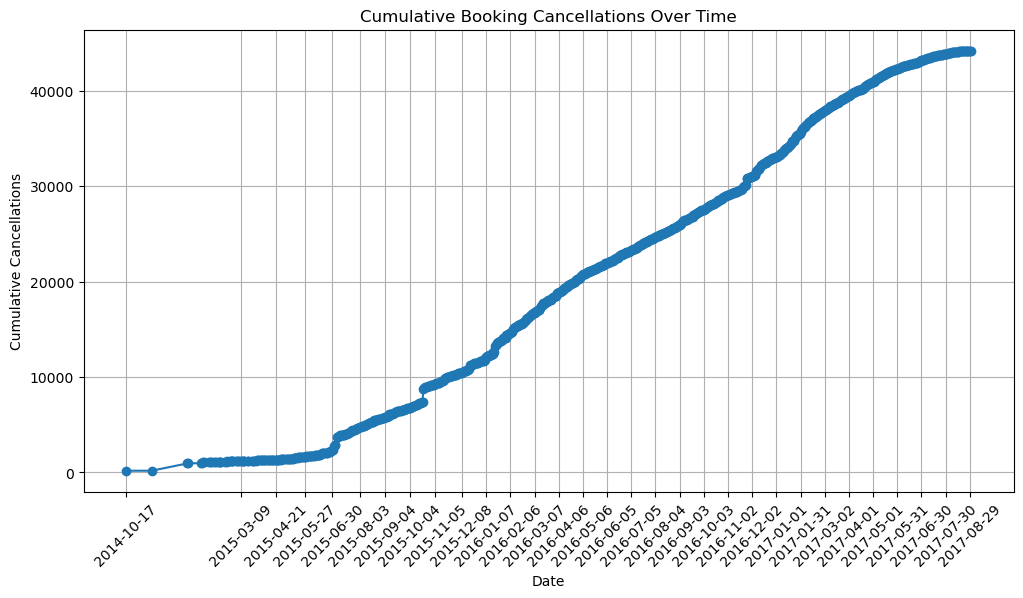

In [94]:
plt.figure(figsize=(12,6))
plt.plot(hotel_df_cancellations["reservation_status_date"], hotel_df_cancellations["cumulative_cancellations"], marker='o', linestyle='-')
plt.xlabel("Date")
plt.ylabel("Cumulative Cancellations")
plt.title("Cumulative Booking Cancellations Over Time")
plt.xticks(hotel_df_cancellations["reservation_status_date"][::30], rotation=45)   ### we are taking every 30th date,
                                                                                   ### and rotated the dates by 45 degrees, so that they are visible.
plt.grid()
plt.show()

### 2) Weighted Booking Score:
#### Compute a weighted cancellation rate by considering both previous_cancellations and previous_bookings_not_canceled.

In [95]:
### we take weighted cancellation rate = ((previous cancellations) / (previous cancellations + previous bookings not cancelled))

In [96]:
hotel_df["weighted_cancellation_rate"] = (hotel_df["previous_cancellations"]  / ( hotel_df["previous_cancellations"] + hotel_df["previous_bookings_not_canceled"]))
# Replace NaN (for cases where both values are 0) with 0
hotel_df["weighted_cancellation_rate"] = hotel_df["weighted_cancellation_rate"].fillna(0)
# Display some rows
hotel_df[["previous_cancellations", "previous_bookings_not_canceled", "weighted_cancellation_rate"]].head()

,previous_cancellations,previous_bookings_not_canceled,weighted_cancellation_rate
0,0,0,0.0
1,0,0,0.0
2,0,0,0.0
3,0,0,0.0
4,0,0,0.0


### 3) Dynamic Rank Calculation:
#### Use ranking techniques to dynamically rank hotels based on their cancellation rate

In [97]:
### here, we take cumulative cancellation rate of each hotel, i.e cancellation_rate = total cancellations/ total bookings per hotel

In [98]:
### so, first let's drop weighted cancellation rate

In [99]:
hotel_df.drop(columns = 'weighted_cancellation_rate' , inplace=True)

In [100]:
hotel_df["cumulative_cancellations"] = hotel_df.groupby("hotel")["is_canceled"].cumsum()
### take total cancellations up to that booking

In [101]:
hotel_df["cumulative_bookings"] = hotel_df.groupby("hotel").cumcount() + 1
### calculate total bookings upto that point

In [102]:
hotel_df["dynamic_cancellation_rate"] = hotel_df["cumulative_cancellations"] / hotel_df["cumulative_bookings"]
### calculate dynamic cancellation rate upto that point

In [103]:
latest_dynamic_rates = hotel_df.groupby("hotel")["dynamic_cancellation_rate"].last().reset_index()
### latest dynamic cancellation rate of each hotel

In [104]:
latest_dynamic_rates["dynamic_rank"] = latest_dynamic_rates["dynamic_cancellation_rate"].rank(method="dense", ascending=False)
# Assign dense ranking (1, 2, 3...) where the lowest rank = highest cancellation rate

In [105]:
ranked_hotel_data = latest_dynamic_rates[["hotel", "dynamic_cancellation_rate", "dynamic_rank"]]
### this contains each hotel entry with their latest dynamic rank
ranked_hotel_data

,hotel,dynamic_cancellation_rate,dynamic_rank
0,City Hotel,0.417270,1.0
1,Resort Hotel,0.277634,2.0


## Advanced Filtering And Parameterized Visualizations

### 1) Dynamic Market Segment Analysis:
#### Create a query that allows users to filter bookings by market segment dynamically.


In [106]:
def filter_bookings_by_market_segment(hotel_df, segment):
    return hotel_df[hotel_df["market_segment"] == segment]
### this is the query, it returns filtered bookings based on the selected market segment

In [107]:
### let's take an example and check

In [108]:
filter_bookings_by_market_segment(hotel_df,"Direct").head()   ### filtering only those bookings with market segment as "Direct"

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status_date,lead_time_sqrt,lead_time_category,cumulative_cancellations,cumulative_bookings,dynamic_cancellation_rate
0,Resort Hotel,0,342,2015,7,1,2,BB,PRT,Direct,...,0,Transient,0.0,0,2015-07-01,18.493242,Large,0,1,0.0
1,Resort Hotel,0,737,2015,7,1,2,BB,PRT,Direct,...,0,Transient,0.0,0,2015-07-01,21.071308,Large,0,2,0.0
2,Resort Hotel,0,7,2015,7,1,1,BB,GBR,Direct,...,0,Transient,75.0,0,2015-07-02,2.645751,Short,0,3,0.0
6,Resort Hotel,0,0,2015,7,1,2,BB,PRT,Direct,...,0,Transient,107.0,0,2015-07-03,0.000000,NaN,0,7,0.0
7,Resort Hotel,0,9,2015,7,1,2,FB,PRT,Direct,...,0,Transient,103.0,1,2015-07-03,3.000000,Short,0,8,0.0


### 2) Find High-Risk Customers:
#### Retrieve a list of customers who had multiple cancellations in the past.


In [109]:
hotel_df[hotel_df["previous_cancellations"]>1]
### filtering those bookings with previous cancellations > 1, these bookings are made by the high risk customers
### since we don't have exact customer details like name, city, etc., we have to consider each booking as a customer

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,adults,meal,country,market_segment,...,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status_date,lead_time_sqrt,lead_time_category,cumulative_cancellations,cumulative_bookings,dynamic_cancellation_rate
13951,Resort Hotel,0,4,2015,10,30,2,BB,PRT,Corporate,...,0,Transient,40.0,2,2015-11-01,2.0,Short,10140,13952,0.726778
13952,Resort Hotel,0,0,2015,12,15,1,BB,PRT,Corporate,...,0,Transient,35.0,2,2015-12-16,0.0,NaN,10140,13953,0.726725
13953,Resort Hotel,0,1,2016,1,19,1,BB,PRT,Corporate,...,0,Transient,30.0,2,2016-01-20,1.0,Short,10140,13954,0.726673
13954,Resort Hotel,0,0,2016,6,20,1,BB,PRT,Corporate,...,0,Transient,63.0,2,2016-06-22,0.0,NaN,10140,13955,0.726621
13955,Resort Hotel,0,1,2016,11,9,1,BB,PRT,Corporate,...,0,Transient,30.0,2,2016-11-10,1.0,Short,10140,13956,0.726569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94396,City Hotel,0,1,2017,7,12,1,BB,PRT,Complementary,...,0,Transient,0.0,3,2017-07-13,1.0,Short,33080,54337,0.608793
94397,City Hotel,0,0,2017,8,1,1,BB,PRT,Complementary,...,0,Transient,0.0,3,2017-08-02,0.0,NaN,33080,54338,0.608782
94398,City Hotel,0,1,2017,8,8,1,BB,PRT,Complementary,...,0,Transient,0.0,3,2017-08-09,1.0,Short,33080,54339,0.608771
94399,City Hotel,0,0,2017,8,15,1,BB,PRT,Complementary,...,0,Transient,0.0,3,2017-08-16,0.0,NaN,33080,54340,0.608760


### 3) Most Frequent Guests:
#### Identify the most frequent guests based on repeated bookings.


In [110]:
# Filter only repeated guests
repeated_guests = hotel_df[hotel_df["is_repeated_guest"] == 1]

# Count occurrences of repeated bookings, by setting a column called repeat bookings
most_frequent_guests = repeated_guests.groupby(["hotel"]).size().reset_index(name="repeat_bookings")

# Sort by the highest repeat bookings
most_frequent_guests = most_frequent_guests.sort_values(by="repeat_bookings", ascending=False)

# Display top frequent guests
most_frequent_guests.head()
# since, we have no data on guests, like how to identify them, we are sorting hotels based on repeated booking

,hotel,repeat_bookings
0,City Hotel,2032
1,Resort Hotel,1778


### 4) Seasonal Booking Trends:
#### Identify peak booking months and trends across different hotels.


In [111]:
monthly_arrivals = hotel_df.groupby(["arrival_date_month", "hotel"]).size().reset_index(name="booking_count")
### grouping the booking counts based on the hotel and arrival month
monthly_arrivals.sort_values(by="booking_count", ascending=False).loc[monthly_arrivals["hotel"]=="City Hotel"]  
### this shows the peak booking months of "City Hotel" , which are 8 -> August, 5-> May in descending order

,arrival_date_month,hotel,booking_count
14,8,City Hotel,8983
8,5,City Hotel,8232
12,7,City Hotel,8088
10,6,City Hotel,7894
18,10,City Hotel,7605
6,4,City Hotel,7480
16,9,City Hotel,7400
4,3,City Hotel,6458
2,2,City Hotel,4965
20,11,City Hotel,4357


In [112]:
monthly_arrivals.sort_values(by="booking_count", ascending=False).loc[monthly_arrivals["hotel"]=="Resort Hotel"]  
### this shows the peak booking months of "City Hotel" , which are 8 -> August, 7-> July in descending order

,arrival_date_month,hotel,booking_count
15,8,Resort Hotel,4894
13,7,Resort Hotel,4573
7,4,Resort Hotel,3609
9,5,Resort Hotel,3559
19,10,Resort Hotel,3555
5,3,Resort Hotel,3336
17,9,Resort Hotel,3108
3,2,Resort Hotel,3103
11,6,Resort Hotel,3045
23,12,Resort Hotel,2648


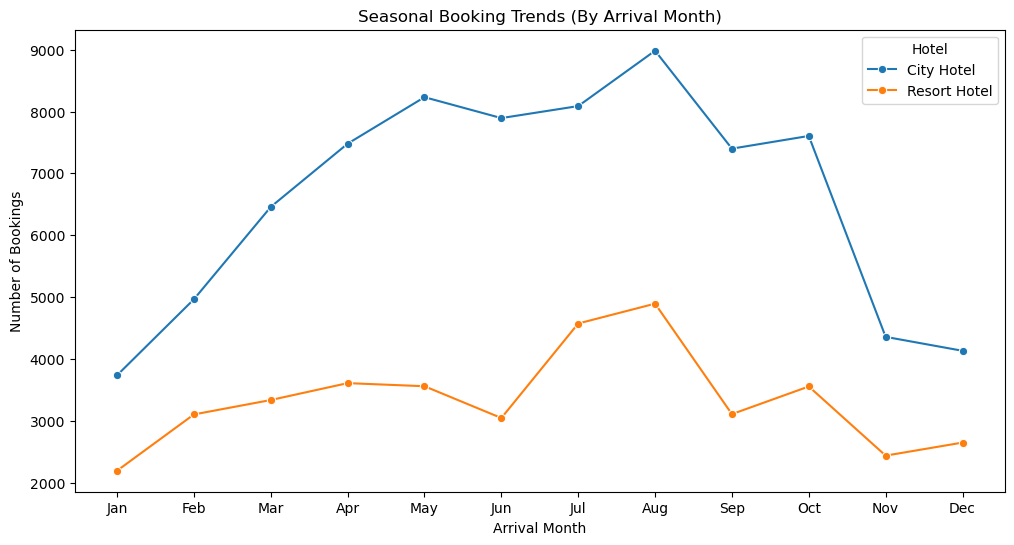

In [113]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_arrivals, x="arrival_date_month", y="booking_count", hue="hotel", marker="o")

plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.xlabel("Arrival Month")
plt.ylabel("Number of Bookings")
plt.title("Seasonal Booking Trends (By Arrival Month)")
plt.legend(title="Hotel")
plt.show()


In [114]:
### We observe that in both hotels, bookings are made in summer (April to August), which suggests a vacation
### In Nov, and Dec, Jan, we observe fewer bookings.

## Joins And Multi-Table Queries

### 1) Hotel-Specific Cancellation Rate:
#### Find the total number of cancellations per hotel type.


In [115]:
hotel_df.groupby("hotel")["is_canceled"].sum().reset_index(name="Total Cancellations")
### we count the total of "is_canceled" column for each hotel, since "is_canceled" is 0 for no cancellations anyways.

,hotel,Total Cancellations
0,City Hotel,33102
1,Resort Hotel,11122


### 2) Countries With High Cancellation Rates:
#### List all countries from which guests have a high tendency to cancel bookings.


In [116]:
country_cancellation_rate = (
    hotel_df.groupby("country")["is_canceled"]
    .agg(total_bookings="count", total_cancellations="sum")
    .assign(cancellation_rate=lambda x: x["total_cancellations"] / x["total_bookings"])
    .reset_index()
)
# here, we take cancellation_rate = total cancellations / total bookings

# Filter countries with high cancellation rates (e.g., > 50%)
high_cancellation_countries = country_cancellation_rate[country_cancellation_rate["cancellation_rate"] > 0.5]

high_cancellation_countries.sort_values("cancellation_rate", ascending=False)

,country,total_bookings,total_cancellations,cancellation_rate
74,IMN,2,2,1.000000
61,GGY,3,3,1.000000
167,UMI,1,1,1.000000
122,NIC,1,1,1.000000
118,MYT,2,2,1.000000
88,KHM,2,2,1.000000
83,JEY,8,8,1.000000
70,HND,1,1,1.000000
64,GLP,2,2,1.000000
172,VGB,1,1,1.000000


## Model Building

In [117]:
### now that we are done with questions, let's drop all the extra columns that were created

In [118]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  int64         
 5   arrival_date_day_of_month       119390 non-null  int64         
 6   adults                          119390 non-null  int64         
 7   meal                            119390 non-null  object        
 8   country                         119390 non-null  object        
 9   market_segment                  119390 non-null  object        
 10  is_repeated_guest               119390 non-null  int64  

In [119]:
hotel_df.drop(columns = ["lead_time","lead_time_category","cumulative_cancellations","cumulative_bookings","dynamic_cancellation_rate"], inplace=True )

In [120]:
### we have removed lead_time, since we will take sqrt value which has less skewness
### now, let's go for categorical variables

In [121]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   arrival_date_year               119390 non-null  int64         
 3   arrival_date_month              119390 non-null  int64         
 4   arrival_date_day_of_month       119390 non-null  int64         
 5   adults                          119390 non-null  int64         
 6   meal                            119390 non-null  object        
 7   country                         119390 non-null  object        
 8   market_segment                  119390 non-null  object        
 9   is_repeated_guest               119390 non-null  int64         
 10  previous_cancellations          119390 non-null  int64  

In [122]:
hotel_df.drop(columns = "arrival_date_day_of_month", inplace=True)   ## since date day of month does not hold a special value

In [123]:
hotel_df.drop(columns = "reservation_status_date", inplace=True)   ## since it does not matter when a person books,
                                                                   ## It's not useful for predicting cancellation

In [124]:
country_counts = hotel_df["country"].value_counts().to_dict()
hotel_df["country"] = hotel_df["country"].map(country_counts)   ## we replace country names with their number of bookings
                                                                ## as we get to see if number of bookings affects the cancellations

In [125]:
### converting all categorical variables into dummy variables 

In [126]:
hotel_df = pd.get_dummies(hotel_df, columns = ["hotel", "meal", "market_segment", "reserved_room_type", 
                    "assigned_room_type", "deposit_type", "customer_type"], drop_first=True).astype(int)

In [127]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 50 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   is_canceled                     119390 non-null  int32
 1   arrival_date_year               119390 non-null  int32
 2   arrival_date_month              119390 non-null  int32
 3   adults                          119390 non-null  int32
 4   country                         119390 non-null  int32
 5   is_repeated_guest               119390 non-null  int32
 6   previous_cancellations          119390 non-null  int32
 7   previous_bookings_not_canceled  119390 non-null  int32
 8   booking_changes                 119390 non-null  int32
 9   days_in_waiting_list            119390 non-null  int32
 10  adr                             119390 non-null  int32
 11  total_of_special_requests       119390 non-null  int32
 12  lead_time_sqrt                  119390 non-n

In [128]:
hotel_df.corr()

,is_canceled,arrival_date_year,arrival_date_month,adults,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.016660,0.011022,0.063176,0.318797,-0.084793,0.110133,-0.057358,-0.144381,0.075538,...,-0.002869,-0.040784,-0.032813,0.003773,0.013071,0.481457,-0.011312,-0.038698,0.133084,-0.124135
arrival_date_year,0.016660,1.000000,-0.527739,0.044102,-0.195522,0.010341,-0.119822,0.029218,0.030872,-0.080976,...,0.001466,0.000252,0.008906,-0.004731,0.004867,-0.065963,-0.000760,-0.010982,0.227954,-0.163588
arrival_date_month,0.011022,-0.527739,1.000000,0.030364,0.024609,-0.030729,0.037479,-0.021640,0.004809,0.011017,...,0.008294,-0.005540,0.004145,0.000419,0.003614,0.008746,-0.020504,0.011810,-0.079522,0.041564
adults,0.063176,0.044102,0.030364,1.000000,-0.153334,-0.166308,-0.008687,-0.129794,-0.044309,-0.026830,...,0.113090,-0.004577,-0.000793,0.000833,0.002887,-0.038283,0.003546,0.006559,0.114927,-0.133690
country,0.318797,-0.195522,0.024609,-0.153334,1.000000,0.161598,0.098161,0.097488,-0.065920,0.110673,...,0.000159,0.018822,0.007226,0.003421,0.011852,0.421645,-0.005000,0.006488,-0.056698,0.053567
is_repeated_guest,-0.084793,0.010341,-0.030729,-0.166308,0.161598,1.000000,0.082293,0.418056,0.012092,-0.027182,...,-0.002303,0.041040,0.055363,-0.000525,-0.001820,-0.058423,-0.001514,0.097977,0.023487,-0.030251
previous_cancellations,0.110133,-0.119822,0.037479,-0.008687,0.098161,0.082293,1.000000,0.152728,-0.026993,0.018239,...,-0.007090,-0.005518,-0.004583,0.003129,-0.001034,0.143314,-0.003803,-0.004186,-0.026525,0.015144
previous_bookings_not_canceled,-0.057358,0.029218,-0.021640,-0.129794,0.097488,0.418056,0.152728,1.000000,0.011608,-0.010351,...,-0.002660,0.001141,-0.003041,0.003600,-0.000918,-0.031509,-0.002919,0.021285,0.030540,-0.028603
booking_changes,-0.144381,0.030872,0.004809,-0.044309,-0.065920,0.012092,-0.026993,0.011608,1.000000,-0.012842,...,0.014603,0.057544,0.069490,-0.000981,-0.003399,-0.119333,0.020991,0.007853,-0.088456,0.105576
days_in_waiting_list,0.075538,-0.080976,0.011017,-0.026830,0.110673,-0.027182,0.018239,-0.010351,-0.012842,1.000000,...,-0.012752,-0.005273,-0.003578,-0.000476,-0.001651,0.181928,0.012651,-0.009456,-0.099848,0.121044


In [129]:
### let's directly drop all coulmns that has correlation between -0.1 and 0.1 with is_cancelled,
### since it is a very weak relationship and does not affect much

In [130]:
hotel_df = hotel_df.drop(columns=hotel_df.corr()['is_canceled'].loc[lambda x: x.between(-0.1, 0.1)].index)

In [131]:
hotel_df.corr()

,is_canceled,country,previous_cancellations,booking_changes,total_of_special_requests,lead_time_sqrt,hotel_Resort Hotel,market_segment_Direct,market_segment_Groups,assigned_room_type_D,deposit_type_Non Refund,customer_type_Transient,customer_type_Transient-Party
is_canceled,1.000000,0.318797,0.110133,-0.144381,-0.234658,0.318350,-0.136531,-0.154390,0.221859,-0.128036,0.481457,0.133084,-0.124135
country,0.318797,1.000000,0.098161,-0.065920,-0.213543,0.033233,0.075680,0.042490,0.264879,-0.115064,0.421645,-0.056698,0.053567
previous_cancellations,0.110133,0.098161,1.000000,-0.026993,-0.048384,0.077860,0.012292,-0.027930,0.098718,-0.043923,0.143314,-0.026525,0.015144
booking_changes,-0.144381,-0.065920,-0.026993,1.000000,0.052833,0.004428,0.072820,0.091988,-0.006375,0.008346,-0.119333,-0.088456,0.105576
total_of_special_requests,-0.234658,-0.213543,-0.048384,0.052833,1.000000,-0.070127,0.043390,0.002042,-0.272410,0.089473,-0.268034,0.131772,-0.157611
lead_time_sqrt,0.318350,0.033233,0.077860,0.004428,-0.070127,1.000000,-0.087706,-0.217758,0.321218,-0.112352,0.352491,-0.171297,0.161086
hotel_Resort Hotel,-0.136531,0.075680,0.012292,0.072820,0.043390,-0.087706,1.000000,0.131794,-0.038688,0.079952,-0.172003,0.005754,-0.027812
market_segment_Direct,-0.154390,0.042490,-0.027930,0.091988,0.002042,-0.217758,0.131794,1.000000,-0.153252,0.020224,-0.126602,0.118055,-0.102356
market_segment_Groups,0.221859,0.264879,0.098718,-0.006375,-0.272410,0.321218,-0.038688,-0.153252,1.000000,-0.140158,0.464153,-0.335266,0.357037
assigned_room_type_D,-0.128036,-0.115064,-0.043923,0.008346,0.089473,-0.112352,0.079952,0.020224,-0.140158,1.000000,-0.178236,0.069781,-0.081314


In [132]:
hotel_df.drop(columns = "customer_type_Transient-Party", inplace=True)  
### as it has high correlation with customer_type_Transient and slightly less correlation with is_cancelled , compared to 
### customer_type_Transient

In [133]:
hotel_df.info()  ## now only have 11 independent variables, which affect the target variable significantly

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   is_canceled                119390 non-null  int32
 1   country                    119390 non-null  int32
 2   previous_cancellations     119390 non-null  int32
 3   booking_changes            119390 non-null  int32
 4   total_of_special_requests  119390 non-null  int32
 5   lead_time_sqrt             119390 non-null  int32
 6   hotel_Resort Hotel         119390 non-null  int32
 7   market_segment_Direct      119390 non-null  int32
 8   market_segment_Groups      119390 non-null  int32
 9   assigned_room_type_D       119390 non-null  int32
 10  deposit_type_Non Refund    119390 non-null  int32
 11  customer_type_Transient    119390 non-null  int32
dtypes: int32(12)
memory usage: 5.5 MB


### Test Train Split

In [134]:
### now we do train test split in X -> independent , Y-> Dependent variables

In [135]:
from sklearn.model_selection import train_test_split
X_multi = hotel_df.drop("is_canceled",axis=1)
y_multi = hotel_df["is_canceled"]
X_train,X_test,y_train,y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(95512, 11) (23878, 11) (95512,) (23878,)


### Standardising Variables (Feature Scaling)

In [136]:
### we standardise variables , so that one feature does not overshadow another

In [137]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [138]:
### since y is binary variable, This is a classification Problem, we now apply several modelling techniques,
### and see which model is better for this data

### Logistic Regression

In [139]:
from sklearn.linear_model import LogisticRegression

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [141]:
## training data

In [142]:
log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_train_s, y_train)

LogisticRegression(random_state=0)

In [143]:
### predicting based on model, and getting the probabilities

In [144]:
y_pred = log_reg.predict(X_test_s)
y_pred_proba = log_reg.predict_proba(X_test_s)[:, 1]  ### auc roc probabilities
y_pred_proba

array([0.66338178, 0.52756961, 0.99508796, ..., 0.1023215 , 0.39861532,
       0.20212663])

In [145]:
## performance metrics

In [146]:
accuracy_score(y_test, y_pred)

0.778834073205461

In [147]:
precision_score(y_test, y_pred)

0.8180239624934884

In [148]:
recall_score(y_test, y_pred)

0.526721824686941

In [149]:
f1_score(y_test, y_pred)

0.6408216010338026

In [150]:
roc_auc_score(y_test, y_pred_proba)

0.8287526835428299

In [151]:
confusion_matrix(y_test, y_pred)

array([[13886,  1048],
       [ 4233,  4711]], dtype=int64)

In [152]:
### overall, the model is predicting well, but lot of false negatives, catching only 52% of actual cancellations

In [153]:
### let's go for next model

### Classification Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
dt_model = DecisionTreeClassifier(random_state=0)

In [156]:
dt_model.fit(X_train_s, y_train)      ### training 

DecisionTreeClassifier(random_state=0)

In [157]:
y_pred_dt = dt_model.predict(X_test_s)

In [158]:
### performance metrics

In [159]:
accuracy_score(y_test, y_pred_dt)

0.8140547784571572

In [160]:
precision_score(y_test, y_pred_dt)

0.791181794672873

In [161]:
recall_score(y_test, y_pred_dt)

0.6841457960644007

In [162]:
f1_score(y_test, y_pred_dt)

0.7337810289003478

In [163]:
roc_auc_score(y_test, y_pred_dt)

0.7880016512128619

In [164]:
confusion_matrix(y_test, y_pred_dt)

array([[13319,  1615],
       [ 2825,  6119]], dtype=int64)

In [165]:
### this time, it has higher recall, means it captures better cancellations

In [166]:
### better accuracy, f1 score : more balanced overall performance
### lower precision and roc means more false positives than logistic regression

In [167]:
### now, let's try random forest as it reduces overfitting

### Random Forest Classification

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [169]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train_s, y_train)  ### initializing and training

RandomForestClassifier(random_state=0)

In [170]:
y_pred_rf = rf_model.predict(X_test_s)  ### predicting

In [171]:
### performance metrics

In [172]:
accuracy_score(y_test, y_pred_rf)

0.8160231175140297

In [173]:
precision_score(y_test, y_pred_rf)

0.7906501468897688

In [174]:
recall_score(y_test, y_pred_rf)

0.6920840787119857

In [175]:
f1_score(y_test, y_pred_rf)

0.738090979550468

In [176]:
roc_auc_score(y_test, y_pred_rf)

0.7911672569802061

In [177]:
confusion_matrix(y_test, y_pred_rf)

array([[13295,  1639],
       [ 2754,  6190]], dtype=int64)

In [178]:
### Random Forest is slightly better than Decision Tree in recall and F1-score, 
### meaning it is capturing positive cases better. But, Logistic Regression has the highest ROC-AUC, 
### meaning it distinguishes between classes well.

In [179]:
### now let's go for gradient boosting classfier

### Gradient Boosting Classification

In [180]:
from sklearn.ensemble import GradientBoostingClassifier

In [181]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=0)
gb_model.fit(X_train_s, y_train)  ### initializing and training model

GradientBoostingClassifier(random_state=0)

In [182]:
y_pred_gb = gb_model.predict(X_test_s)   ### predicting

In [183]:
### performance metrics

In [184]:
accuracy_score(y_test, y_pred_gb)

0.8068514951000921

In [185]:
precision_score(y_test, y_pred_gb)

0.8168519602106495

In [186]:
recall_score(y_test, y_pred_gb)

0.6243291592128801

In [187]:
f1_score(y_test, y_pred_gb)

0.7077313054499367

In [188]:
roc_auc_score(y_test, y_pred_gb)

0.7702468080783834

In [189]:
 confusion_matrix(y_test, y_pred_gb)

array([[13682,  1252],
       [ 3360,  5584]], dtype=int64)

In [190]:
### precision has increased but not the best 

In [191]:
### now let's go for HyperParameter Tuning

### Hyper Parameter Tuning for Logistic Regression

In [192]:
### Before jumping on, let us discuss the most important thing about the problem. This model needs to predict cancellations. If 
### there is a false negative, which means if the model predicts this booking won't get canceled and it is canceled, that will cost dearly
### to the hotel, and since the 'is_canceled' variable is imbalanced as seen below, a model predicting more 0's will have high accuracy, 
### so we need our model to predict positives better, so it needs to balance precision and recall, which means we need the best F-1 Score

In [193]:
y_train.value_counts(normalize=True)   ### checking how balanced the values in the target variable are

is_canceled
0    0.630622
1    0.369378
Name: proportion, dtype: float64

In [194]:
from sklearn.model_selection import GridSearchCV

In [195]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Compatible solvers
}
### here we define hyperparameter values, in this case, we take:
### C : it regularises and prevents underfitting and overfitting
### penalty : types of regularisation, l1 is lasso, l2 is ridge
### solver : different optimisation solver algorithms

In [196]:
log_reg = LogisticRegression(max_iter=1000)  ## initializing the model

In [197]:
### Grid Search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_s, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [198]:
grid_search.best_params_   ### these are the best parameters to get the best f1

{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

In [199]:
best_log_reg = grid_search.best_estimator_
y_pred = best_log_reg.predict(X_test_s)   ### using that and predicting

In [200]:
## now evaluating performance metrics

In [201]:
accuracy_score(y_test, y_pred)

0.778834073205461

In [202]:
precision_score(y_test, y_pred)

0.8180239624934884

In [203]:
recall_score(y_test, y_pred)

0.526721824686941

In [204]:
f1_score(y_test, y_pred)

0.6408216010338026

In [205]:
roc_auc_score(y_test, best_log_reg.predict_proba(X_test_s)[:, 1])

0.8287489925858633

In [206]:
confusion_matrix(y_test, y_pred)

array([[13886,  1048],
       [ 4233,  4711]], dtype=int64)

In [207]:
### by comparing it to the untuned logistic regression f1 score, which is 0.6408216, this new f1 score is the same,
### which means the cross validation, and hyper parameter tuning didn't work for logistic, lets try to move on to decision trees

### Hyper Parameter Tuning for Classification Tree

In [208]:
### For Decision tree, we will tune:
### 1) max_depth of the tree
### 2) min_samples_split
### 3) min_samples_leaf
### 4) criterion : gini or entropy, which decides how the tree splits

In [209]:
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [210]:
# Initialize Decision Tree model
dt = DecisionTreeClassifier(random_state=0)

In [211]:
# Perform Grid Search
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)
grid_search.fit(X_train_s, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [212]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [213]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test_s)

In [214]:
### done with getting the best params, applying the best estimator model

In [215]:
### now, lets evaluate performance metrics

In [216]:
accuracy_score(y_test, y_pred)

0.816441913058045

In [217]:
precision_score(y_test, y_pred)

0.8025739684224492

In [218]:
recall_score(y_test, y_pred)

0.676319320214669

In [219]:
f1_score(y_test, y_pred)

0.7340573994296462

In [220]:
roc_auc_score(y_test, best_dt.predict_proba(X_test_s)[:, 1])

0.8804478974033152

In [221]:
confusion_matrix(y_test, y_pred)

array([[13446,  1488],
       [ 2895,  6049]], dtype=int64)

In [252]:
### this is a minor improvement in f1 score from 0.73378 to 0.73405, but it is good,
### huge improvement in roc, meaning better separation of classes, now let's go for random forest

### Hyper Parameter Tuning for Random Forest Classification

In [223]:
### for random forest, we tune:
### 1) n_estimators (number of trees)
### 2) max_depth (depth of each tree)
### 3) min_samples_split (minimum samples to split an internal node)
### 4) min_samples_leaf (minimum samples required at a leaf node)
### 5) criterion (Gini impurity or entropy)

In [224]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [5, 10], 
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [1, 2], 
    'criterion': ['gini', 'entropy'] 
}

In [225]:
# Initialize the model
rf = RandomForestClassifier(random_state=0)
# Perform Grid Search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5, verbose=2, n_jobs=-1)

In [226]:
# Fit the model
grid_search_rf.fit(X_train_s, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=2)

In [227]:
### Best Parameters
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [228]:
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_s)

In [229]:
### Now, let's evaluate performance metrics

In [230]:
accuracy_score(y_test, y_pred_rf)

0.8068933746544936

In [231]:
precision_score(y_test, y_pred_rf)

0.8227320125130344

In [232]:
recall_score(y_test, y_pred_rf)

0.6175089445438283

In [233]:
f1_score(y_test, y_pred_rf)

0.7054991377658555

In [234]:
roc_auc_score(y_test, best_rf.predict_proba(X_test_s)[:, 1])

0.8817597181624193

In [235]:
confusion_matrix(y_test, y_pred_rf)

array([[13744,  1190],
       [ 3421,  5523]], dtype=int64)

In [254]:
## this also does not show an improvement in f1 score, it decreased. but improvement in roc
### which means, Tuning improved the model's ability to differentiate between classes (ROC AUC) but at the cost of F1-score.
### It suggests that tuning might have increased bias, affecting balanced performance.

### Hyperparameter Tuning for Gradient Boosting

In [237]:
### for random forest, we tune:
### 1) n_estimators (number of trees)
### 2) max_depth (depth of each tree)
### 3) learning rate
### 4) sub sample

In [238]:
###  Define parameter grid
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

In [239]:
### initialize model
gb = GradientBoostingClassifier(random_state=0)
### Perform Grid Search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, scoring='f1', cv=5, verbose=2, n_jobs=-1)
### Fit the model
grid_search_gb.fit(X_train_s, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             scoring='f1', verbose=2)

In [240]:
grid_search_gb.best_params_   ### best parameters

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

In [241]:
best_gb = grid_search_gb.best_estimator_    ### taking the model with best parameters and predicting
y_pred_gb = best_gb.predict(X_test_s)

In [242]:
### evaluating performance metrics

In [243]:
accuracy_score(y_test, y_pred_gb)

0.8142222966747634

In [244]:
precision_score(y_test, y_pred_gb)

0.811411992263056

In [245]:
recall_score(y_test, y_pred_gb)

0.6566413237924866

In [246]:
f1_score(y_test, y_pred_gb)

0.7258682486713632

In [247]:
roc_auc_score(y_test, best_gb.predict_proba(X_test_s)[:, 1])

0.8869382880080824

In [248]:
confusion_matrix(y_test, y_pred_gb)

array([[13569,  1365],
       [ 3071,  5873]], dtype=int64)

In [255]:
### great improvement in f1 : 0.7077 -> 0.72586, roc : 0.7702 -> 0.8869,
### Significant improvements in both metrics, making it the most balanced upgrade.

## Final Takeaway:
### Best F1-Score Model (before tuning) → Random Forest (0.7380)
### Best ROC AUC Model (after tuning) → Gradient Boosting (0.8869)
### If we need an overall balanced model → Gradient Boosting after tuning seems the best choice!